# Hands-on Activity 2.3 Regularization

Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 313
Code Title: | Advanced Machine Learning and Deep Learning
2nd Semester | AY 2023-2024
<hr> | <hr>
<u>**ACTIVITY NO.** | **Hands-on Activity 2.3 Regularization**
**Name** | Mendoza, Paulo
<hr> | <hr>
**Section** | CPE32S8
**Date Performed**: | February 15, 2023
**Date Submitted**: | February 15, 2023
**Instructor**: | Engr. Roman M. Richard

<hr>

#### Objective(s):

This activity aims to demonstrate how to apply  regularization in neural networks

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train neural networks with regularization
* Demonstrate how to visualize the model with regularization
* Evaluate the result of model with regularization


#### Resources:
* Jupyter Notebook
* MNIST


#### Procedures
Load the necessary libraries

In [ ]:
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Load the data, shuffled and split between train and test sets

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Get the size of the sample train data

In [ ]:
x_train[0].shape

(28, 28)

Check the sample train data

In [ ]:
x_train[333]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  87, 138,
        170, 253, 201, 244, 212, 222, 138,  86,  22,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  95, 253, 252,
        252, 252, 252, 253, 252, 252, 252, 252, 245,  80,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  68, 246, 205,  69,
         69,  69,  69,  69,  69,  69,  69, 205, 253, 240,  50,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 187, 252, 218,  34,
          0,   0,   0,   0,   0,   0,   0, 116, 253, 252,  69,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 116, 248, 252, 253,  92,
          0,   0,   0,   0,   0,   0,  95, 230, 253, 157,   6,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 116, 249, 253, 189,  42,
          0,   0,   0,   0,  36, 170, 253, 243, 158,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 133, 252, 245, 140,
         34,   0,   0,  57, 219, 252, 235,  60,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  25, 205, 253, 252,
        234, 184, 184, 253, 240, 100,  44,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  21, 161, 219,
        252, 252, 252, 234,  37,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 203,
        252, 252, 252, 251, 135,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   9,  76, 255, 253,
        205, 168, 220, 255, 253, 137,   5,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 114, 252, 249, 132,
         25,   0,   0, 180, 252, 252,  45,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  51, 220, 252, 199,   0,
          0,   0,   0,  38, 186, 252, 154,   7,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 184, 252, 252,  21,   0,
          0,   0,   0,   0,  67, 252, 252,  22,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 184, 252, 200,   0,   0,
          0,   0,   0,   0,  47, 252, 252,  22,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 185, 253, 201,   0,   0,
          0,   0,   0,   3, 118, 253, 245,  21,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 163, 252, 252,   0,   0,
          0,   0,   0,  97, 252, 252,  87,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  51, 240, 252, 123,  70,
         70, 112, 184, 222, 252, 170,  13,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 165, 252, 253, 252,
        252, 252, 252, 245, 139,  13,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

Check the corresponding label in the training set

In [ ]:

y_train[333]

8

Check the actual image

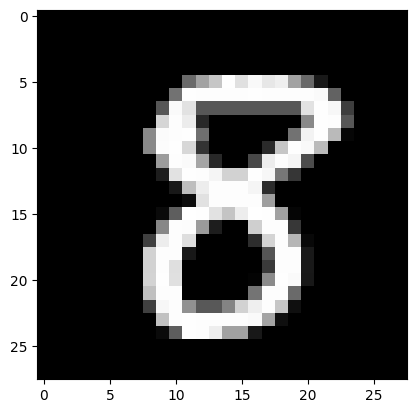

In [ ]:

plt.imshow(x_train[333], cmap='Greys_r')

Check the shape of the x_train and x_test

In [ ]:

print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

(60000, 28, 28) train samples
(10000, 28, 28) test samples


* Convert the x_train and x_test
* Cast the numbers to floats
* Normalize the inputs

In [ ]:

x_train = x_train.reshape(len(x_train), 28*28)
x_test = x_test.reshape(len(x_test), 28*28)


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


x_train /= 255
x_test /= 255


Convert class vectors to binary class matrices

In [ ]:

num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

y_train[333]  # now the digit k is represented by a 1 in the kth entry (0-indexed) of the length 10 vector

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

* Build the model with two hidden layers of size 512.
* Use dropout of 0.2
* Check the model summary

In [ ]:

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                50240     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 55050 (215.04 KB)
Trainable params: 55050 (215.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Compile the model using learning rate of 0.001 and optimizer of RMSprop

In [ ]:
learning_rate = .001
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=learning_rate),
              metrics=['accuracy'])
batch_size = 128  # mini-batch with 128 examples
epochs = 30
history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Epoch 1/30
469/469 [==============================] - 3s 5ms/step - loss: 0.5191 - accuracy: 0.8452 - val_loss: 0.2148 - val_accuracy: 0.9356
Epoch 2/30
469/469 [==============================] - 2s 5ms/step - loss: 0.2567 - accuracy: 0.9240 - val_loss: 0.1546 - val_accuracy: 0.9528
Epoch 3/30
469/469 [==============================] - 2s 4ms/step - loss: 0.2014 - accuracy: 0.9401 - val_loss: 0.1264 - val_accuracy: 0.9617
Epoch 4/30
469/469 [==============================] - 2s 4ms/step - loss: 0.1737 - accuracy: 0.9495 - val_loss: 0.1130 - val_accuracy: 0.9664
Epoch 5/30
469/469 [==============================] - 2s 4ms/step - loss: 0.1570 - accuracy: 0.9537 - val_loss: 0.1077 - val_accuracy: 0.9699
Epoch 6/30
469/469 [==============================] - 2s 4ms/step - loss: 0.1432 - accuracy: 0.9575 - val_loss: 0.1022 - val_accuracy: 0.9696
Epoch 7/30
469/469 [==============================] - 2s 4ms/step - loss: 0.1366 - accuracy: 0.9593 - val_loss: 0.0965 - val_accuracy: 0.9723
Epoch 

Use Keras evaluate function to evaluate performance on the test set

In [ ]:

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.10383091866970062
Test accuracy: 0.9761000275611877


We have achieve 97% accuracy in testing data set which is very good. And loss is also good as it is very close to 0.

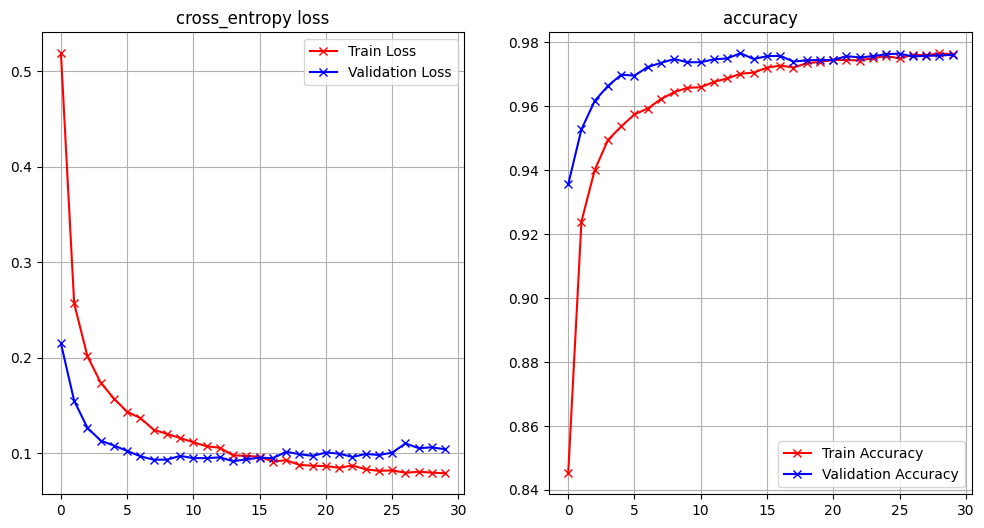

In [ ]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)


plot_loss_accuracy(history)

the cross entropy loss graph was great and the train loss and validation loss are following the right curve and is close to oneanother meaning it is not underfitting and not overfitting. In the accuracy graph that is also the case and in the last epoch their accuracy is almost the same which is very great.

#### Supplementary Activity

* Use the Keras "Sequential" functionality to build a new model (model_1) with the following specifications:

1. Two hidden layers.
2. First hidden layer of size 400 and second of size 300
3. Dropout of .4 at each layer
4. How many parameters does your model have?  How does it compare with the previous model?
5. Train this model for 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128
6. Use at least two  regularization techniques and apply it to the new model (model_2)
7. Train this model for your preferred epochs , learning rate, batch size and optimizer
8. Compare the accuracy and loss (training and validation) of model_1 and model_2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
import pandas as pd
filepath = "/content/drive/MyDrive/data sci 3 files/mounted files/kyphosis.csv"

df = pd.read_csv(filepath);


# Print the first rows of the pandas DataFrame.
df.tail()

,Kyphosis,Age,Number,Start
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6
80,absent,36,4,13


In [ ]:
df['Kyphosis'] = df['Kyphosis'].apply(lambda x: 1 if x=="present" else 0)

In [ ]:
df

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1
4,0,1,4,15
...,...,...,...,...
76,1,157,3,13
77,0,26,7,13
78,0,120,2,13
79,1,42,7,6


In [ ]:
X = df.iloc[:, 1:].values
y = df["Kyphosis"].values

In [ ]:
X

array([[ 71,   3,   5],
       [158,   3,  14],
       [128,   4,   5],
       [  2,   5,   1],
       [  1,   4,  15],
       [  1,   2,  16],
       [ 61,   2,  17],
       [ 37,   3,  16],
       [113,   2,  16],
       [ 59,   6,  12],
       [ 82,   5,  14],
       [148,   3,  16],
       [ 18,   5,   2],
       [  1,   4,  12],
       [168,   3,  18],
       [  1,   3,  16],
       [ 78,   6,  15],
       [175,   5,  13],
       [ 80,   5,  16],
       [ 27,   4,   9],
       [ 22,   2,  16],
       [105,   6,   5],
       [ 96,   3,  12],
       [131,   2,   3],
       [ 15,   7,   2],
       [  9,   5,  13],
       [  8,   3,   6],
       [100,   3,  14],
       [  4,   3,  16],
       [151,   2,  16],
       [ 31,   3,  16],
       [125,   2,  11],
       [130,   5,  13],
       [112,   3,  16],
       [140,   5,  11],
       [ 93,   3,  16],
       [  1,   3,   9],
       [ 52,   5,   6],
       [ 20,   6,   9],
       [ 91,   5,  12],
       [ 73,   5,   1],
       [ 35,   3

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11111)

In [ ]:
np.mean(y), np.mean(1-y)

(0.20987654320987653, 0.7901234567901234)

In [ ]:
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

In [ ]:

model1 = Sequential()
model1.add(Dense(400, activation='relu', input_shape=(3,)))
model1.add(Dropout(0.4))
model1.add(Dense(300, activation='relu'))
model1.add(Dropout(0.4))
model1.add(Dense(1, activation='sigmoid'))



learning_rate = .001
model1.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=learning_rate),
              metrics=['accuracy'])
batch_size = 128  # mini-batch with 128 examples
epochs = 30
history = model1.fit(
    X_train_norm, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(X_test_norm, y_test))

Epoch 1/30
1/1 [==============================] - 1s 885ms/step - loss: 0.6805 - accuracy: 0.4667 - val_loss: 0.5965 - val_accuracy: 0.7143
Epoch 2/30
1/1 [==============================] - 0s 43ms/step - loss: 0.5654 - accuracy: 0.8500 - val_loss: 0.5580 - val_accuracy: 0.7143
Epoch 3/30
1/1 [==============================] - 0s 41ms/step - loss: 0.5060 - accuracy: 0.8167 - val_loss: 0.5283 - val_accuracy: 0.7143
Epoch 4/30
1/1 [==============================] - 0s 40ms/step - loss: 0.4755 - accuracy: 0.8167 - val_loss: 0.4984 - val_accuracy: 0.7143
Epoch 5/30
1/1 [==============================] - 0s 42ms/step - loss: 0.4167 - accuracy: 0.8167 - val_loss: 0.4776 - val_accuracy: 0.7143
Epoch 6/30
1/1 [==============================] - 0s 42ms/step - loss: 0.4016 - accuracy: 0.8333 - val_loss: 0.4608 - val_accuracy: 0.7619
Epoch 7/30
1/1 [==============================] - 0s 40ms/step - loss: 0.3918 - accuracy: 0.8333 - val_loss: 0.4486 - val_accuracy: 0.7619
Epoch 8/30
1/1 [==========

In [ ]:

score = model1.evaluate(X_test_norm, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.35920023918151855
Test accuracy: 0.8571428656578064


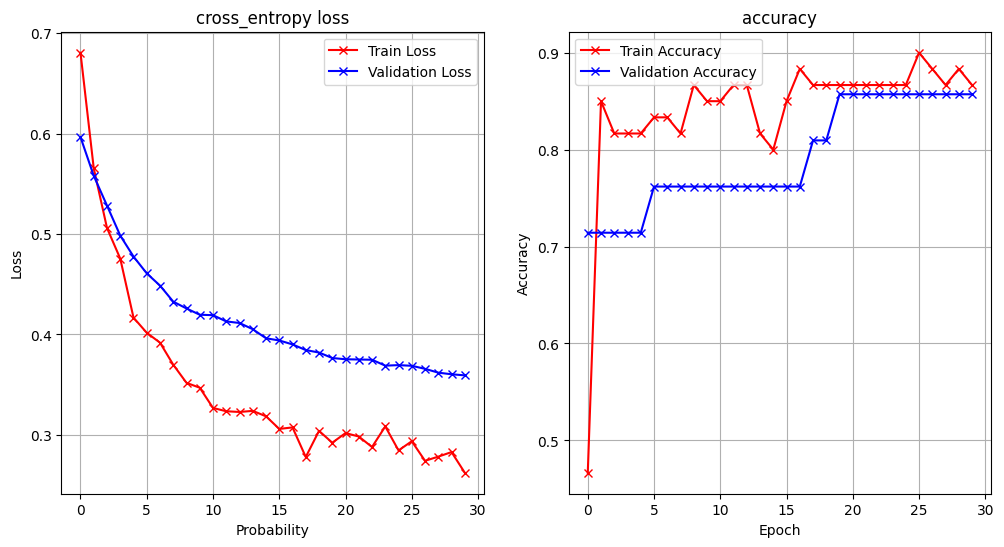

In [ ]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)
    plt.xlabel("Probability")
    plt.ylabel("Loss")


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")


plot_loss_accuracy(history)

Epoch 1/30
1/1 [==============================] - 1s 1s/step - loss: 1.7736 - accuracy: 0.5167 - val_loss: 1.6455 - val_accuracy: 0.7143
Epoch 2/30
1/1 [==============================] - 0s 86ms/step - loss: 1.6209 - accuracy: 0.8167 - val_loss: 1.5812 - val_accuracy: 0.7143
Epoch 3/30
1/1 [==============================] - 0s 60ms/step - loss: 1.5275 - accuracy: 0.8167 - val_loss: 1.5358 - val_accuracy: 0.7143
Epoch 4/30
1/1 [==============================] - 0s 87ms/step - loss: 1.4638 - accuracy: 0.8333 - val_loss: 1.4986 - val_accuracy: 0.7143
Epoch 5/30
1/1 [==============================] - 0s 54ms/step - loss: 1.4169 - accuracy: 0.8167 - val_loss: 1.4650 - val_accuracy: 0.7143
Epoch 6/30
1/1 [==============================] - 0s 78ms/step - loss: 1.3794 - accuracy: 0.8167 - val_loss: 1.4348 - val_accuracy: 0.7143
Epoch 7/30
1/1 [==============================] - 0s 74ms/step - loss: 1.3539 - accuracy: 0.8167 - val_loss: 1.4062 - val_accuracy: 0.7143
Epoch 8/30
1/1 [=============

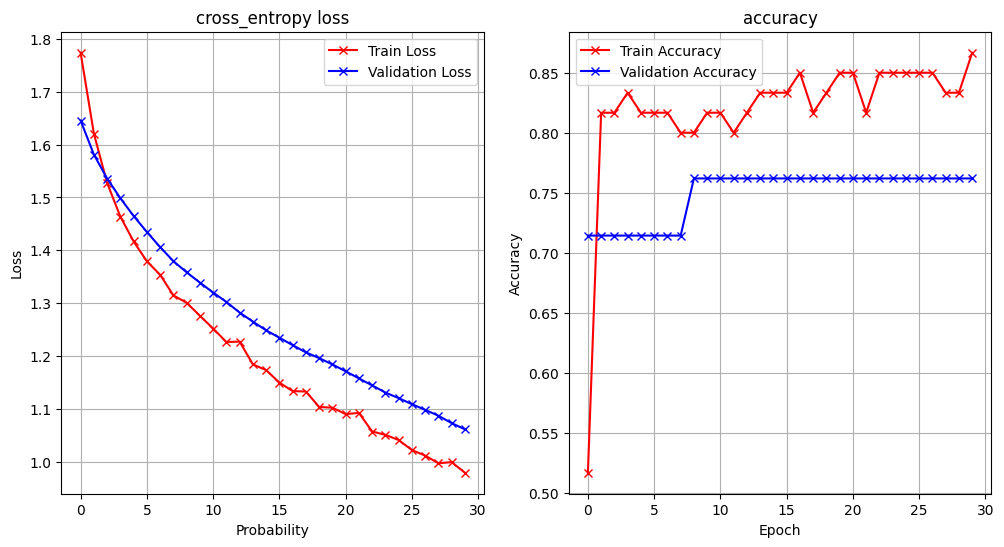

In [ ]:
model2 = Sequential()
model2.add(Dense(400, activation='relu',kernel_regularizer=keras.regularizers.L1(0.01), input_shape=(3,)))
model2.add(Dropout(0.4))
model2.add(Dense(300, kernel_regularizer=keras.regularizers.L2(0.001),activation='relu'))
model2.add(Dropout(0.4))
model2.add(Dense(1, activation='sigmoid'))



learning_rate = .001
model2.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=learning_rate),
              metrics=['accuracy'])
batch_size = 128  # mini-batch with 128 examples
epochs = 30
history = model2.fit(
    X_train_norm, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(X_test_norm, y_test))


score = model2.evaluate(X_test_norm, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


plot_loss_accuracy(history)

#### Conclusion

The model1 is have Dropout for regularization while model2 have additional L1 and L2 regularization. model1 performed better with accuracy of 85.7% while model2 only have 76.2%.

# Google Collab Link:

https://colab.research.google.com/drive/1I1rsOuG61o3_TT777V1xZCG9-A4QYa_4?usp=sharing